# DS 542 - 2025 Fall - Homework 3

Solve the following problems using PyTorch and then submit in [Gradescope](https://www.gradescope.com/courses/1071076).


Do not use any PyTorch module classes for any of the problems.
Tensors and functions such as `tensor.log` and automatic gradient tracking are allowed.

## Problem 1 - Compute Roots of a Function

The roots of a function are inputs that make that function zero.
Use gradient descent to solve for both roots of $f(x) = x^2 - 4x + 1$.

Save the two roots in a variable `roots` and print it.

Hint: The discussion on 9/17 will focus on similar problems.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math

In [45]:
def f(x):
  return x**2 - 4*x + 1

In [57]:
a = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
lr = 0.05
steps = 2000
loss_hist, a_hist, b_hist = [], [], []
# Training loop
for t in range(steps):
    loss = f(a)**2 + f(b)**2
    loss_hist.append(loss.item())
    a_hist.append(a.item())
    b_hist.append(b.item())

    loss.backward()

    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad

        a.grad.zero_()
        b.grad.zero_()

roots = [a.item(), b.item()]

In [58]:
# YOUR CHANGES HERE
roots

[0.2679491937160492, 3.732050895690918]

## Problem 2 - Implement Logistic Regression

Implement logistic regression in PyTorch to predict the outcome column of the Pima Indians Diabetes data set.

In [59]:
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv("https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/raw/refs/heads/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
input_df = df.drop(columns=["Outcome"])
target = df["Outcome"]

### Part A - Setup the Logistic Regression and Prediction Function

In [108]:
# YOUR CHANGES HERE
n_features = 8
weights = torch.randn(n_features, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

def predict(X, weights, bias):
    """
    Logistic regression prediction function using torch.sigmoid()
    """
    # Linear combination: z = X * weights + bias
    z = torch.matmul(X, weights) + bias

    # Apply sigmoid
    predictions = torch.sigmoid(z)

    return predictions

### Part B - Write a Function Calculating the Loss for this Logistic Regression

In [109]:
# YOUR CHANGES HERE
# sigmoid function
def compute_loss(y_true, y_pred):
    """
    Binary cross-entropy loss: -(1/m) * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
    """
    eps = 1e-15  # Small value to prevent log(0)
    m = y_true.shape[0]
    loss = -(1/m) * torch.sum(
        y_true * torch.log(y_pred + eps) +
        (1 - y_true) * torch.log(1 - y_pred + eps)
    )
    return loss

print("\nPart B - Loss Function Defined")


Part B - Loss Function Defined


### Part C - Optimize the Logistic Regression Parameters using Gradient Descent

In [110]:
def train_logistic_regression(X, y, weights, bias, lr=0.01, steps=1000):
    """
    Train logistic regression using gradient descent
    """
    loss_history = []

    for t in range(steps):
        # Zero gradients at the start of each iteration
        if weights.grad is not None:
            weights.grad.zero_()
        if bias.grad is not None:
            bias.grad.zero_()

        # Forward pass
        y_pred = predict(X, weights, bias)

        # Compute loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss.item())

        # Backward pass
        loss.backward()

        # Update parameters manually (no optimizer)
        with torch.no_grad():
            weights.data -= lr * weights.grad
            bias.data -= lr * bias.grad

        # Print progress every 100 steps
        if t % 100 == 0:
            print(f'Step {t}, Loss: {loss.item():.4f}')

    return loss_history

print("\nPart C - Training Logistic Regression...")

# Train the model
loss_history = train_logistic_regression(X, y, weights, bias, lr=0.1, steps=1000)

# Calculate final accuracy
with torch.no_grad():
    final_predictions = predict(X, weights, bias)
    binary_predictions = (final_predictions >= 0.5).float()
    accuracy = torch.mean((binary_predictions == y).float())
    print(f"\nFinal Accuracy: {accuracy.item():.4f}")



Part C - Training Logistic Regression...
Step 0, Loss: 12.1072
Step 100, Loss: 22.4862
Step 200, Loss: 22.4862
Step 300, Loss: 22.4862
Step 400, Loss: 22.4862
Step 500, Loss: 22.4862
Step 600, Loss: 22.4862
Step 700, Loss: 22.4862
Step 800, Loss: 22.4862
Step 900, Loss: 22.4862

Final Accuracy: 0.3490


### Part D - Plot Ground Truth vs Predicted Probabilities

Make a scatter plot where your logistic regression's predictions for each row of the data set are the x-axis, and the actual outcome is the y axis.


Part D - Plotting Results...


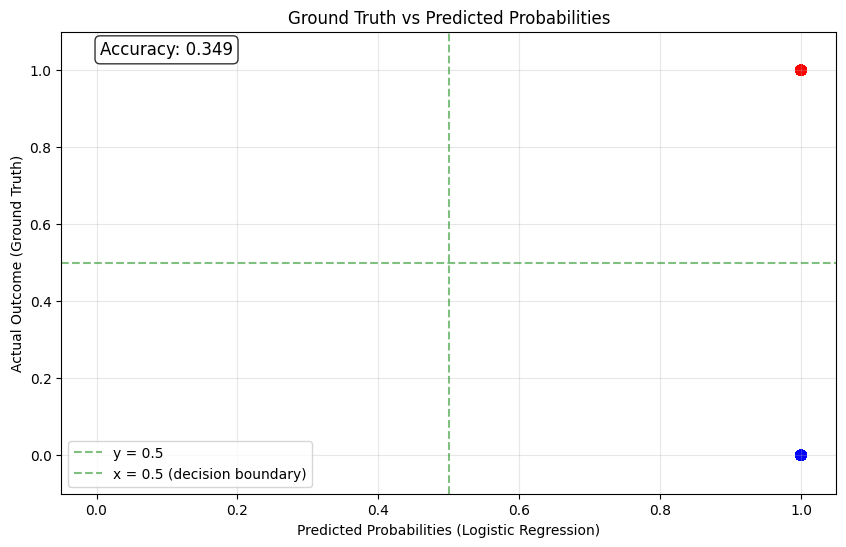

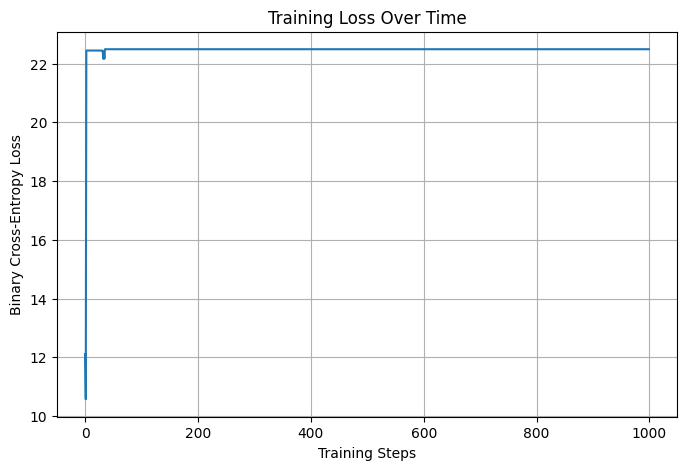


All parts completed!
SUMMARY:
Dataset size: 768 samples, 8 features
Final loss: 22.4862
Final accuracy: 0.3490


In [111]:
def plot_predictions_vs_actual(X, y, weights, bias):
    """
    Make a scatter plot where logistic regression predictions are x-axis
    and actual outcomes are y-axis
    """
    # Get predictions for all data points
    with torch.no_grad():
        predictions = predict(X, weights, bias)

    # Convert to numpy for plotting
    pred_probs = predictions.numpy()
    actual_outcomes = y.numpy()

    # Create scatter plot
    plt.figure(figsize=(10, 6))

    # Create scatter plot with different colors for each class
    colors = ['blue' if outcome == 0 else 'red' for outcome in actual_outcomes]
    plt.scatter(pred_probs, actual_outcomes, alpha=0.6, s=50, c=colors)

    # Labels and title
    plt.xlabel('Predicted Probabilities (Logistic Regression)')
    plt.ylabel('Actual Outcome (Ground Truth)')
    plt.title('Ground Truth vs Predicted Probabilities')
    plt.grid(True, alpha=0.3)

    # Add reference lines
    plt.axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='y = 0.5')
    plt.axvline(x=0.5, color='green', linestyle='--', alpha=0.5, label='x = 0.5 (decision boundary)')

    # Add accuracy information
    accuracy = torch.mean(((predictions >= 0.5).float() == y).float())
    plt.text(0.05, 0.95, f'Accuracy: {accuracy.item():.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add legend
    plt.legend()

    # Set axis limits
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.1, 1.1)

    # Show plot
    plt.show()

print("\nPart D - Plotting Results...")

# Create the scatter plot
plot_predictions_vs_actual(X, y, weights, bias)

# Also plot the training loss over time
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title('Training Loss Over Time')
plt.xlabel('Training Steps')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)
plt.show()

print("\nAll parts completed!")
print("="*50)
print("SUMMARY:")
print(f"Dataset size: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Final loss: {loss_history[-1]:.4f}")
print(f"Final accuracy: {accuracy.item():.4f}")
print("="*50)

## Problem 3 - Implement a Shallow Neural Network

Implement a neural network with one hidden layer to predict the outcome column of the Pima Indians Diabetes data set.

### Part A - Setup the Neural Network and Prediction Function

In [97]:
# Part A - Setup the Neural Network and Prediction Function

# Network architecture
input_features = 8
hidden_units = 10  # You can adjust this
output_units = 1

# Initialize weights and biases for hidden layer
W1 = torch.randn(input_features, hidden_units, requires_grad=True) * 0.1
b1 = torch.zeros(hidden_units, requires_grad=True)

# Initialize weights and biases for output layer
W2 = torch.randn(hidden_units, output_units, requires_grad=True) * 0.1
b2 = torch.zeros(output_units, requires_grad=True)

# Activation functions
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def relu(z):
    return torch.maximum(torch.tensor(0.0), z)

# Neural network prediction function
def predict_nn(X, W1, b1, W2, b2):
    # Forward pass through hidden layer
    z1 = torch.matmul(X, W1) + b1  # Linear combination
    a1 = relu(z1)  # ReLU activation

    # Forward pass through output layer
    z2 = torch.matmul(a1, W2) + b2  # Linear combination
    a2 = sigmoid(z2)  # Sigmoid activation for binary classification

    return a2.squeeze()  # Remove extra dimension

### Part B - Write a Function Calculating the Loss for the Neural Network

In [98]:
def compute_nn_loss(y_true, y_pred):
    # Binary cross-entropy loss
    eps = 1e-15  # Small value to prevent log(0)
    m = y_true.shape[0]
    loss = -(1/m) * torch.sum(
        y_true * torch.log(y_pred + eps) +
        (1 - y_true) * torch.log(1 - y_pred + eps)
    )
    return loss

### Part C - Optimize the Neural Network with Gradient Descent

In [99]:
def train_neural_network(X, y, W1, b1, W2, b2, lr=0.01, epochs=1000):
    loss_history = []

    for epoch in range(epochs):
        # Zero gradients first
        if W1.grad is not None:
            W1.grad.zero_()
        if b1.grad is not None:
            b1.grad.zero_()
        if W2.grad is not None:
            W2.grad.zero_()
        if b2.grad is not None:
            b2.grad.zero_()

        # Forward pass
        y_pred = predict_nn(X, W1, b1, W2, b2)

        # Compute loss
        loss = compute_nn_loss(y, y_pred)
        loss_history.append(loss.item())

        # Backward pass
        loss.backward()

        # Update parameters manually (no optimizer)
        with torch.no_grad():
            W1 -= lr * W1.grad
            b1 -= lr * b1.grad
            W2 -= lr * W2.grad
            b2 -= lr * b2.grad

        # Print progress
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    return loss_history

# Convert your pandas data to PyTorch tensors
X = torch.tensor(input_df.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32)

print("Neural Network Architecture:")
print(f"Input features: {input_features}")
print(f"Hidden units: {hidden_units}")
print(f"Output units: {output_units}")
print(f"Total parameters: {(input_features * hidden_units + hidden_units) + (hidden_units * output_units + output_units)}")

print("\nInitial weights shapes:")
print(f"W1: {W1.shape}, b1: {b1.shape}")
print(f"W2: {W2.shape}, b2: {b2.shape}")

# Train the neural network
print("\nTraining Neural Network...")
loss_history = train_neural_network(X, y, W1, b1, W2, b2, lr=0.1, epochs=1000)

# Make predictions and calculate accuracy
with torch.no_grad():
    final_predictions = predict_nn(X, W1, b1, W2, b2)
    binary_predictions = (final_predictions >= 0.5).float()
    accuracy = torch.mean((binary_predictions == y).float())
    print(f"\nFinal Neural Network accuracy: {accuracy.item():.4f}")

Neural Network Architecture:
Input features: 8
Hidden units: 10
Output units: 1
Total parameters: 101

Initial weights shapes:
W1: torch.Size([8, 10]), b1: torch.Size([10])
W2: torch.Size([10, 1]), b2: torch.Size([1])

Training Neural Network...


/tmp/ipython-input-86617739.py:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  if W1.grad is not None:
/tmp/ipython-input-86617739.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

### Part D - Plot Ground Truth vs Predicted Probabilities

Make a scatter plot where your neural network's predictions for each row of the data set are the x-axis, and the actual outcome is the y axis.

In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Part A - Setup the Neural Network and Prediction Function

# Network architecture
input_features = 8 # You can adjust this
output_units = 1

# Initialize weights and biases for hidden layer
W1 = torch.randn(input_features, hidden_units, requires_grad=True) * 0.1
b1 = torch.zeros(hidden_units, requires_grad=True)

# Initialize weights and biases for output layer
W2 = torch.randn(hidden_units, output_units, requires_grad=True) * 0.1
b2 = torch.zeros(output_units, requires_grad=True)

# Activation functions
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def relu(z):
    return torch.maximum(torch.tensor(0.0), z)

# Neural network prediction function
def predict_nn(X, W1, b1, W2, b2):
    # Forward pass through hidden layer
    z1 = torch.matmul(X, W1) + b1  # Linear combination
    a1 = relu(z1)  # ReLU activation

    # Forward pass through output layer
    z2 = torch.matmul(a1, W2) + b2  # Linear combination
    a2 = sigmoid(z2)  # Sigmoid activation for binary classification

    return a2.squeeze()  # Remove extra dimension

# Part B - Write a Function Calculating the Loss for the Neural Network

def compute_nn_loss(y_true, y_pred):
    # Binary cross-entropy loss
    eps = 1e-15  # Small value to prevent log(0)
    m = y_true.shape[0]
    loss = -(1/m) * torch.sum(
        y_true * torch.log(y_pred + eps) +
        (1 - y_true) * torch.log(1 - y_pred + eps)
    )
    return loss

# Part C - Optimize the Neural Network with Gradient Descent

def train_neural_network(X, y, W1, b1, W2, b2, lr=0.01, epochs=1000):
    loss_history = []

    for epoch in range(epochs):
        # Zero gradients at the beginning of each iteration
        if W1.grad is not None:
            W1.grad.zero_()
        if b1.grad is not None:
            b1.grad.zero_()
        if W2.grad is not None:
            W2.grad.zero_()
        if b2.grad is not None:
            b2.grad.zero_()

        # Forward pass
        y_pred = predict_nn(X, W1, b1, W2, b2)

        # Compute loss
        loss = compute_nn_loss(y, y_pred)
        loss_history.append(loss.item())

        # Backward pass
        loss.backward()

        # Update parameters manually (no optimizer)
        with torch.no_grad():
            W1.data -= lr * W1.grad
            b1.data -= lr * b1.grad
            W2.data -= lr * W2.grad
            b2.data -= lr * b2.grad

        # Print progress
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    return loss_history

# Convert your pandas data to PyTorch tensors
# Note: Make sure input_df and target are defined in your environment
X = torch.tensor(input_df.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32)

# Reinitialize weights to ensure they are leaf tensors
W1 = torch.randn(input_features, hidden_units, requires_grad=True) * 0.1
b1 = torch.zeros(hidden_units, requires_grad=True)
W2 = torch.randn(hidden_units, output_units, requires_grad=True) * 0.1
b2 = torch.zeros(output_units, requires_grad=True)

print("Neural Network Architecture:")
print(f"Input features: {input_features}")
print(f"Hidden units: {hidden_units}")
print(f"Output units: {output_units}")
print(f"Total parameters: {(input_features * hidden_units + hidden_units) + (hidden_units * output_units + output_units)}")

print("\nInitial weights shapes:")
print(f"W1: {W1.shape}, b1: {b1.shape}")
print(f"W2: {W2.shape}, b2: {b2.shape}")

# Train the neural network
print("\nTraining Neural Network...")
loss_history = train_neural_network(X, y, W1, b1, W2, b2, lr=0.1, epochs=1000)

# Make predictions and calculate accuracy
with torch.no_grad():
    final_predictions = predict_nn(X, W1, b1, W2, b2)
    binary_predictions = (final_predictions >= 0.5).float()
    accuracy = torch.mean((binary_predictions == y).float())
    print(f"\nFinal Neural Network accuracy: {accuracy.item():.4f}")

# Part D - Plot Ground Truth vs Predicted Probabilities

def plot_nn_predictions_vs_actual(X, y, W1, b1, W2, b2):
    # Get predictions for all data points
    with torch.no_grad():
        predictions = predict_nn(X, W1, b1, W2, b2)

    # Convert to numpy for plotting
    pred_probs = predictions.numpy()
    actual_outcomes = y.numpy()

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(pred_probs, actual_outcomes, alpha=0.6, s=50)
    plt.xlabel('Predicted Probabilities (Neural Network)')
    plt.ylabel('Actual Outcome (Ground Truth)')
    plt.title('Neural Network: Ground Truth vs Predicted Probabilities')
    plt.grid(True, alpha=0.3)

    # Add reference lines
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Decision boundary (y=0.5)')
    plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5)

    # Add some statistics
    accuracy = torch.mean(((predictions >= 0.5).float() == y).float())
    plt.text(0.05, 0.95, f'NN Accuracy: {accuracy.item():.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.legend()
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.1, 1.1)
    plt.show()

# Plot the results
plot_nn_predictions_vs_actual(X, y, W1, b1, W2, b2)

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title('Neural Network Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

print("Neural Network training completed!")

Neural Network Architecture:
Input features: 8
Hidden units: 10
Output units: 1
Total parameters: 101

Initial weights shapes:
W1: torch.Size([8, 10]), b1: torch.Size([10])
W2: torch.Size([10, 1]), b2: torch.Size([1])

Training Neural Network...


/tmp/ipython-input-328497374.py:58: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  if W1.grad is not None:
/tmp/ipython-input-328497374.py:62: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pyto

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'